# Linear Regression in Python

* Reference [https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0]

## Ordinary Least Squres

* Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# make random data
np. random.seed(0)

X = 2.5 * np.random.randn(100) + 1.5
res = 0.5 * np.random.randn(100)
y = 2 + 0.3 * X + res

In [7]:
# Create datafram using pandas
df = pd.DataFrame({'X' : X,
                   'y' : y})
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


-----

* To estimate y using the OLS method, we should calculate xmean and ymean, the covariance of X and y (xycov), and the variance of X (xvar) before we can determine the values for alpha and beta.

* Yₑ = α + β X

In [10]:
# figure out X and y
xmean = np.mean(X)
ymean = np.mean(y)

# make columns that are xyconv and xvar in df to compute beta and alpha
df['xyconv'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean) ** 2

# figure out beta and alpha
beta = df['xyconv'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beat = {beta}')

alpha = 2.0031670124623426
beat = 0.3229396867092763


In [12]:
#define ypred
ypred = alpha + beta * X

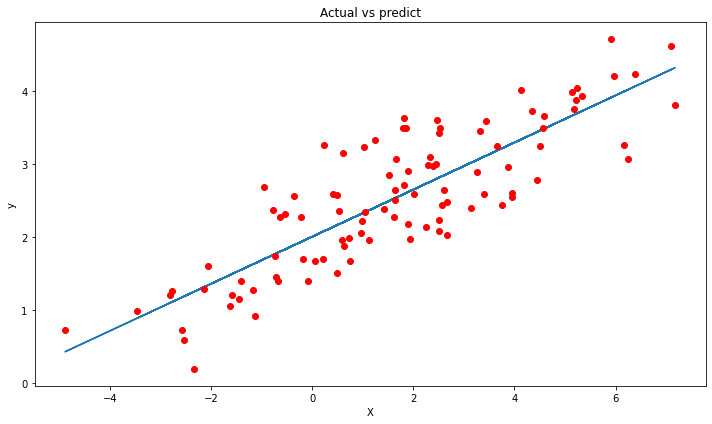

In [37]:
plt.figure(figsize = (10, 6))
plt.plot(X, ypred)
plt.plot(X, y, 'ro')
plt.title('Actual vs predict')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()

## Use statsmodels

In [16]:
#Import advertision dataset with using pd.read_csv
ad = pd.read_csv('Advertising.csv')
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
ad = ad[["TV", "radio", "newspaper", "sales"]]
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


-----

In [27]:
import statsmodels.formula.api as sm

In [33]:
# make sure when you create model that has to be fit() beside sm.ols()
model = sm.ols(formula = 'sales ~ TV', data = ad).fit()

In [35]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

* Now we can figure out α = 7.032 and β = 0.047 because of using model.params

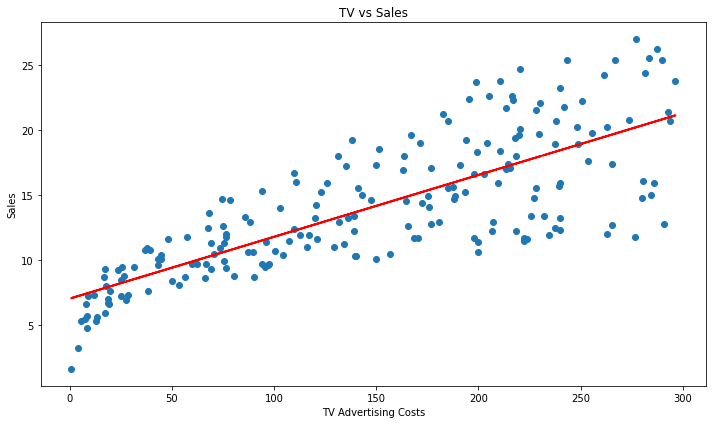

In [38]:
sales_pred = model.predict()

plt.figure(figsize = (10,6))
plt.plot(ad['TV'], ad['sales'], 'o')
plt.plot(ad['TV'], sales_pred, 'r', linewidth = 2)
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.tight_layout()
plt.show()

In [40]:
model.predict({"TV" : 300, "radio": 10, "newspaper": 4})

0    21.293586
dtype: float64

-----

## Linear Regression with sklearn

* we are going to use this formula Sales = α + β₁*TV + β₂*Radio.

In [47]:
from sklearn.linear_model import LinearRegression

predict = ['TV', 'radio']
X = ad[predict]
y = ad['sales']

# Initialise and fit model
lr = LinearRegression()
model = lr.fit(X, y)

In [48]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.921099912405131
betas = [0.04575482 0.18799423]


In [50]:
model.predict(X)[:5]

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813])

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
n_X = [[200, 130]]
print(model.predict(n_X))

[36.51131239]
